In [ ]:
!pip install torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
!pip install tensorflow


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensor format
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values to the range [-1, 1]
])

# Load the training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Load the testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders for training and testing datasets
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16240746.93it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 456798.65it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4446652.13it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10601295.92it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50, VGG16

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
img_rows, img_cols = 28, 28
num_classes = 10

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Training parameters
batch_size = 128
epochs = 20

# Define VGG model
def create_vgg_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Create and compile VGG model
vgg_model = create_vgg_model(input_shape, num_classes)
vgg_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train VGG model and store the training history
vgg_history = vgg_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Print the epochs for each training
for epoch in range(epochs):
    print(f"Epoch {epoch+1}: {vgg_history.history['val_loss'][epoch]}, {vgg_history.history['val_accuracy'][epoch]}")


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
469/469 [==============================] - 255s 538ms/step - loss: 0.1433 - accuracy: 0.9556 - val_loss: 0.0392 - val_accuracy: 0.9880
Epoch 2/20
469/469 [==============================] - 254s 541ms/step - loss: 0.0366 - accuracy: 0.9884 - val_loss: 0.0331 - val_accuracy: 0.9888
Epoch 3/20
469/469 [==============================] - 249s 530ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0259 - val_accuracy: 0.9916
Epoch 4/20
469/469 [==============================] - 249s 531ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0289 - val_accuracy: 0.9908
Epoch 5/20
469/469 [==============================] - 246s 524ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0248 - val_accuracy: 0.9929
Epoch 6/20
469/469 [==============================] - 246s 524ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0296 - val_accuracy: 0.9914
Epoch 7/20
469/469 [==============================] - 244s 

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, concatenate

def inception_module(x, filters):
    conv1x1 = Conv2D(filters=filters[0], kernel_size=(1,1), padding='same', activation='relu')(x)

    conv3x3 = Conv2D(filters=filters[1], kernel_size=(3,3), padding='same', activation='relu')(x)

    conv5x5 = Conv2D(filters=filters[2], kernel_size=(5,5), padding='same', activation='relu')(x)

    maxpool = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(x)
    conv_pool = Conv2D(filters=filters[3], kernel_size=(1,1), padding='same', activation='relu')(maxpool)

    return concatenate([conv1x1, conv3x3, conv5x5, conv_pool], axis=-1)

def build_googlenet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    conv1 = Conv2D(filters=64, kernel_size=(7,7), strides=(2,2), padding='same', activation='relu')(inputs)
    maxpool1 = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(conv1)

    conv2 = Conv2D(filters=64, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu')(maxpool1)
    conv2 = Conv2D(filters=192, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv2)
    maxpool2 = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(conv2)

    inception3a = inception_module(maxpool2, [64, 128, 32, 32])
    inception3b = inception_module(inception3a, [128, 192, 96, 64])
    maxpool3 = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(inception3b)

    flatten = Flatten()(maxpool3)
    dense1 = Dense(units=512, activation='relu')(flatten)
    dropout = Dropout(0.4)(dense1)
    outputs = Dense(units=num_classes, activation='softmax')(dropout)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to have a single channel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build and compile the model
model = build_googlenet((28, 28, 1), 10)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20  # You can adjust this
history = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test))

# Print the epochs for each training
for epoch in range(epochs):
    print(f"Epoch {epoch+1}: {history.history['val_loss'][epoch]}, {history.history['val_accuracy'][epoch]}")


Epoch 1/20
469/469 [==============================] - 268s 566ms/step - loss: 0.2953 - accuracy: 0.9008 - val_loss: 0.0538 - val_accuracy: 0.9813
Epoch 2/20
469/469 [==============================] - 263s 561ms/step - loss: 0.0545 - accuracy: 0.9834 - val_loss: 0.0367 - val_accuracy: 0.9886
Epoch 3/20
469/469 [==============================] - 265s 566ms/step - loss: 0.0394 - accuracy: 0.9880 - val_loss: 0.0372 - val_accuracy: 0.9887
Epoch 4/20
469/469 [==============================] - 264s 562ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.0285 - val_accuracy: 0.9916
Epoch 5/20
469/469 [==============================] - 263s 560ms/step - loss: 0.0273 - accuracy: 0.9920 - val_loss: 0.0243 - val_accuracy: 0.9915
Epoch 6/20
469/469 [==============================] - 264s 563ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.0280 - val_accuracy: 0.9915
Epoch 7/20
469/469 [==============================] - 263s 562ms/step - loss: 0.0197 - accuracy: 0.9942 - val_loss: 0.0327 -

Digit Samples for VGG Model:


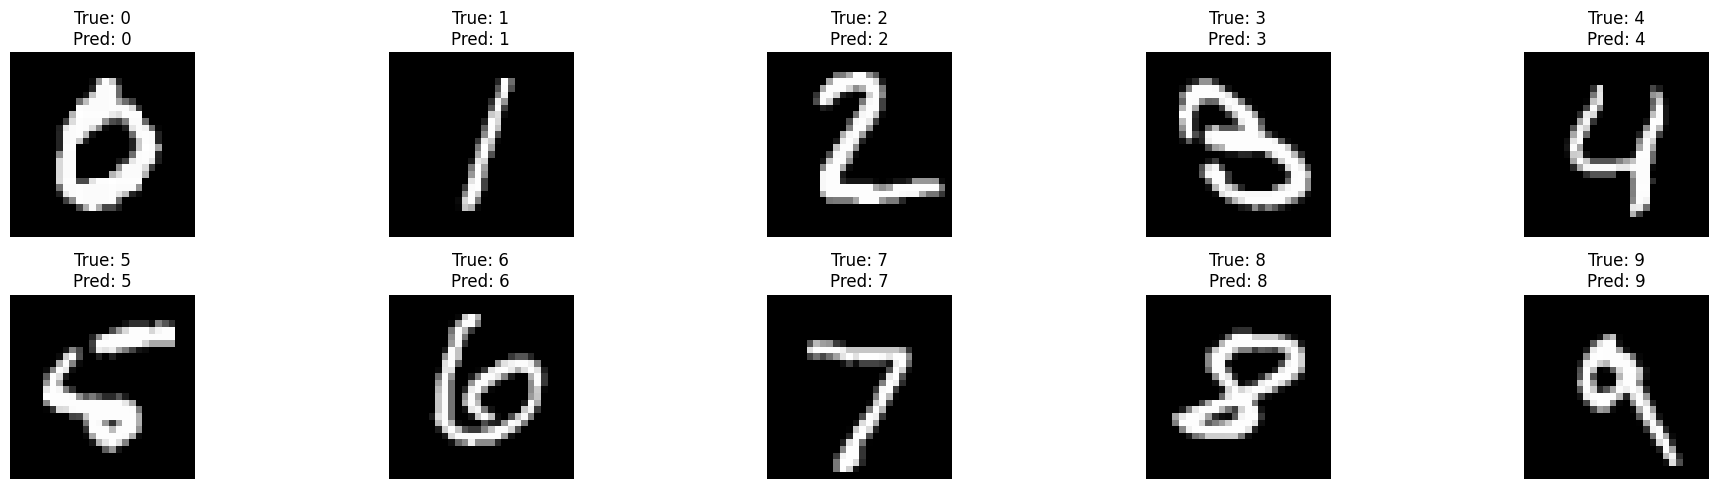

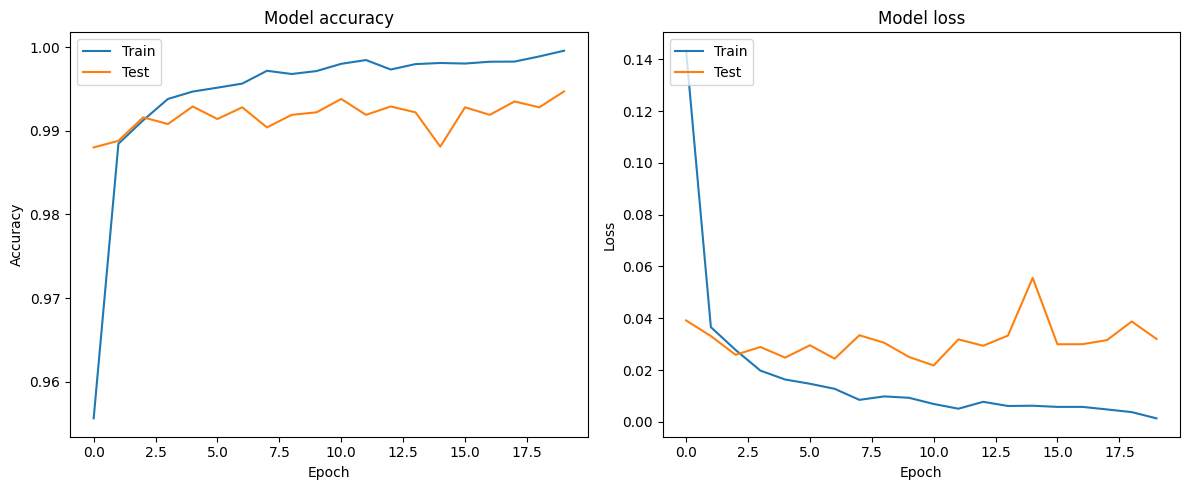

Digit Samples for GoogLeNet Model:


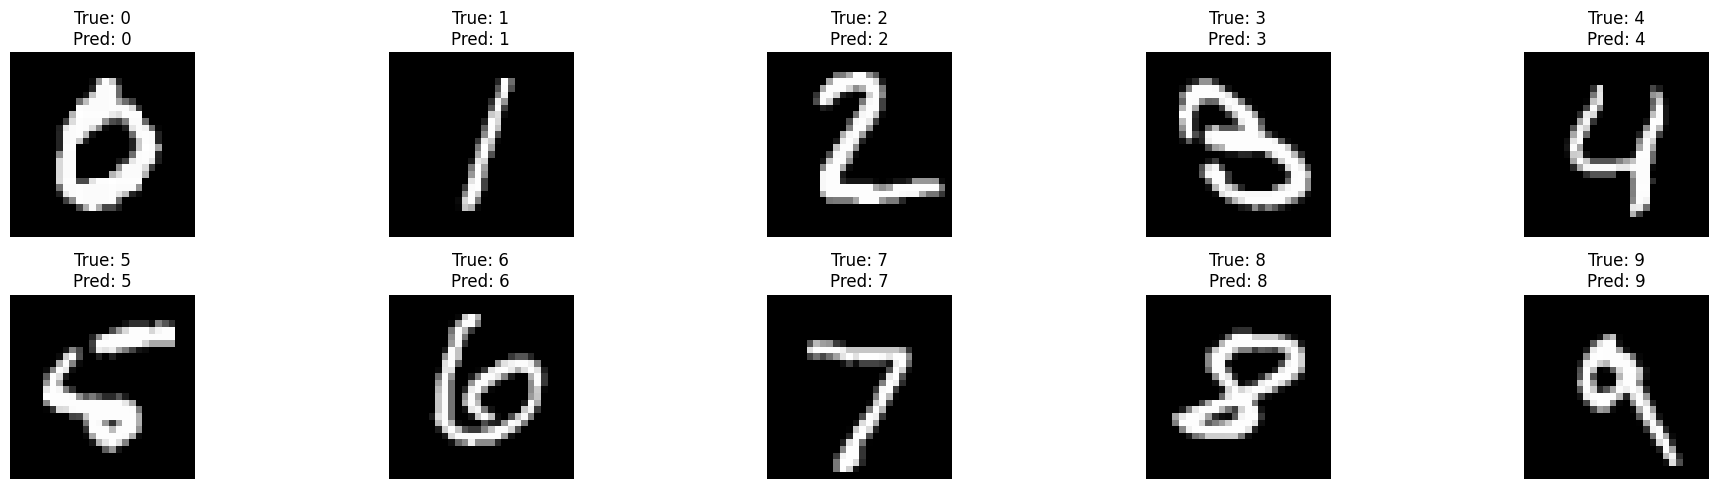

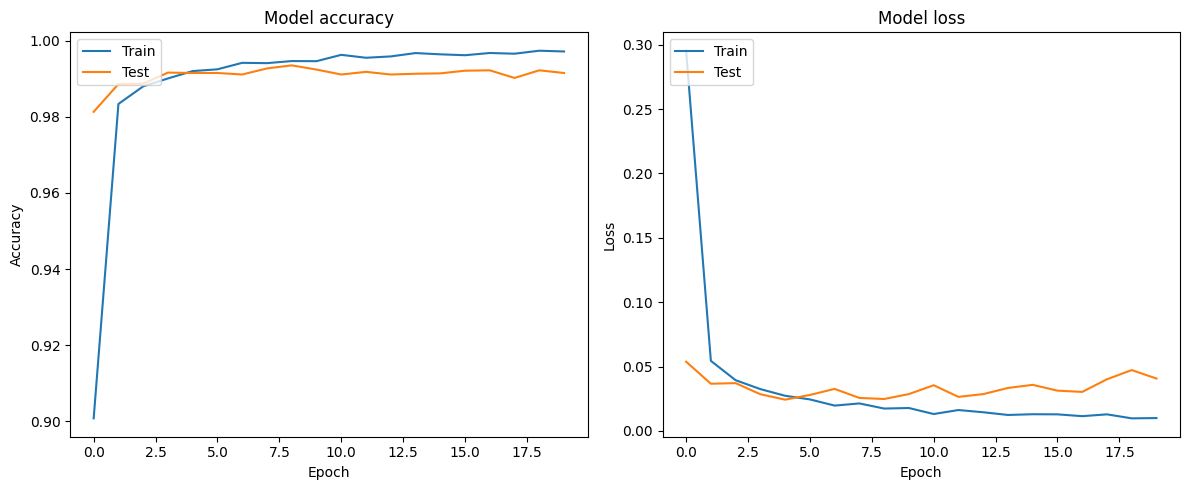

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define function to display one sample image for each digit alongside other images in a single row
def display_digit_samples(model, x_test, y_test):
    unique_digits = set(np.argmax(y_test, axis=1))

    plt.figure(figsize=(20, 5))
    for i, digit in enumerate(unique_digits):
        digit_indices = np.where(np.argmax(y_test, axis=1) == digit)[0]
        digit_image = x_test[digit_indices[0]]  # Select the first image for each digit
        digit_label = y_test[digit_indices[0]]

        plt.subplot(2, 5, i + 1)
        plt.imshow(digit_image.reshape(28, 28), cmap='gray')
        plt.title(f"True: {digit}\nPred: {np.argmax(digit_label)}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display  digit samples for VGG model
print("Digit Samples for VGG Model:")
display_digit_samples(vgg_model, x_test, y_test)


# Function to plot accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot accuracy and loss for VGG model
plot_history(vgg_history)

# Display unique digit samples for GoogLeNet model
print("Digit Samples for GoogLeNet Model:")
display_digit_samples(model, x_test, y_test)

# Plot accuracy and loss for GoogLeNet model
plot_history(history)
